## Clasificador de texto de IMDb con Scikit-Learn

En este proyecto vamos a clasificar el texto de las review de peliculas realizadas en el sitio web IMDb. Para llevar acabo este proyecto se utilizara la libreria Scikit-Learn de python aplicando 4 algoritmos como son máquinas de soporte vectorial, arboles de decisión, naive bayes y regresión logística. 

# 1. Configuramos el ambiente de trabajo

Se procede a realizar la configuración de nuestro entorno en la nube, para que se comporte como un entorno local de trabajo y se pueda manejar el sistema de archivos.

In [27]:
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
%cd "/content/drive/My Drive/Colab Notebooks/Bases de datos"
!ls

/content/drive/My Drive/Colab Notebooks/Bases de datos
 BasePruebaTecnicaCientifico.csv  'IMDB Dataset.csv'


# 2. Preparar data

## 2.1 Importamos las librerias

In [57]:
# Importamos librerias
import pandas as pd # Libreria para el tratamiento de DataFrames
import numpy as np # Libreria númerica
import matplotlib.pyplot as plt # Libreria gráfica
import seaborn as sns # Libreria gráfica
from imblearn.under_sampling import RandomUnderSampler # Balanceo
from sklearn.model_selection import train_test_split # Dividir los datos en entrenamiento y prueba
from sklearn.feature_extraction.text import TfidfVectorizer # Transformar texto en datos
from sklearn.svm import SVC # Máquinas de vectores de soporte
from sklearn.tree import DecisionTreeClassifier # Arboles de decisión
from sklearn.naive_bayes import GaussianNB # Naive bayes
from sklearn.linear_model import LogisticRegression # Regresión logistica
from sklearn.metrics import f1_score # Precisión
from sklearn.metrics import classification_report # Reporte de clasificación
from sklearn.metrics import confusion_matrix # Matriz de confusión
from sklearn.model_selection import GridSearchCV # Grid Search


## 2.2 Cargamos el Dataset

In [29]:
# Cargamos el dataset
df_review = pd.read_csv("IMDB Dataset.csv")

In [30]:
# Observamos las 5 primeras filas
df_review.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [31]:
# Observamos la cantidad de datos
df_review.value_counts('sentiment')

sentiment
negative    25000
positive    25000
dtype: int64

In [33]:
# Aplicamos desbalanceado
df_positivo = df_review[df_review['sentiment']=='positive'][:9000]
df_negativo = df_review[df_review['sentiment']=='negative'][:1000]

df_review_des = pd.concat([df_positivo, df_negativo])
df_review_des.value_counts('sentiment')

sentiment
positive    9000
negative    1000
dtype: int64

## 2.3 Balanceando Dataset

In [34]:
# Balancemos con RandomUnderSampler
rus = RandomUnderSampler()
df_review_bal, df_review_bal['sentiment'] = rus.fit_resample(df_review_des[['review']],
                                                          df_review_des['sentiment'])

df_review_bal.value_counts(['sentiment'])

sentiment
negative     1000
positive     1000
dtype: int64

## 2.4 Seperación data para entrenar (train) y testear(test)

In [7]:
# Dividimos los datos
train, test = train_test_split(df_review_bal, test_size=0.20, random_state=42)

In [8]:
# Creamos las variables x y 
x_train, y_train = train["review"], train["sentiment"]
x_test, y_test = test["review"], test["sentiment"]

# 3. Representación de texto (Bag of Words)

In [9]:
# transformamos los datos

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(x_train)

test_x_vector = tfidf.transform(x_test)

In [35]:
# Observamos el train_x_vector
train_x_vector

<1600x22472 sparse matrix of type '<class 'numpy.float64'>'
	with 141652 stored elements in Compressed Sparse Row format>

# 4. Aplicación de  Scikit-Learn

## 4.1 Support Vector Machines (SVM)

In [54]:
svc = SVC(kernel='linear')
svc.fit(train_x_vector, y_train)


SVC(kernel='linear')

## Testeo

In [38]:
print(svc.predict(tfidf.transform(['A good movie']))) #buena pelicula
print(svc.predict(tfidf.transform(['An excellent movie']))) #excelente pelicula
print(svc.predict(tfidf.transform(['"I did not like this movie at all I gave this movie away"'])))# no gusto

['positive']
['positive']
['negative']


## 4.2 Decision Tree

In [55]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector,y_train)


DecisionTreeClassifier()

## 4.3 Naive Bayes

In [53]:
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), y_train)


GaussianNB()

## 4.4 Logistic Regression

In [41]:
lr = LogisticRegression()
lr.fit(train_x_vector, y_train)

LogisticRegression()

# 5. Evaluacion del Modelo

## 5.1 Score (Accuracy)

In [64]:
# Compración de precisión de los modelos
print(svc.score(test_x_vector, y_test))
print(dec_tree.score(test_x_vector, y_test))
print(gnb.score(test_x_vector.toarray(), y_test))
print(lr.score(test_x_vector, y_test))

0.8425
0.65
0.6275
0.835


## 5.2 F1 Score
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [43]:
f1_score(y_test, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)

array([0.84520885, 0.83969466])

## 5.3 Reporte de Clasificacion

In [44]:
print(classification_report(y_test, svc.predict(test_x_vector),
                      labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.83      0.86      0.85       201
    negative       0.85      0.83      0.84       199

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



## 5.4 Confusion Matrix

In [58]:
# Matriz de confusión
cnf_matrix = confusion_matrix(y_test, svc.predict(test_x_vector),
                 labels=['positive', 'negative'])


Text(0.5, 257.44, 'Etiqueta de predicción')

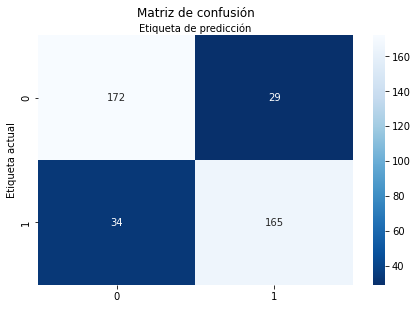

In [63]:
# Gráfica de matriz de confusión
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "Blues_r", fmt = "g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusión", y = 1.1)
plt.ylabel("Etiqueta actual")
plt.xlabel("Etiqueta de predicción")

# 6. Optimización del Modelo

## 6.1 GridSearchCV

In [65]:
paremetros = {'C':[1,4,8,16,32], 'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc, paremetros, cv=5)
svc_grid.fit(train_x_vector, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [66]:
# Mejor estimador y parametros
print(svc_grid.best_estimator_)
print(svc_grid.best_params_)

SVC(C=1, kernel='linear')
{'C': 1, 'kernel': 'linear'}


In [67]:
# Score del modelo
svc_grid.best_score_

0.8362499999999999